In [103]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
star_df = pd.read_csv('https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-')
star_df.sample(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
175,3614,145000.000000,1553.0000,-7.71,5,Red,M
32,15276,1136.000000,7.2000,-1.97,3,Blue-White,B
234,21904,748490.000000,1130.0000,-7.67,5,Blue-White,B
31,30000,28840.000000,6.3000,-4.20,3,Blue-White,B
206,24020,0.001590,0.0127,10.55,2,Blue,B
128,2856,0.000896,0.0782,19.56,0,Red,M
16,2799,0.001800,0.1600,14.79,1,Red,M
37,6380,1.350000,0.9800,2.93,3,Yellow-White,F
178,12100,120000.000000,708.9000,-7.84,5,Blue-White,B
0,3068,0.002400,0.1700,16.12,0,Red,M


In [105]:
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [106]:
folder_name = 'star_plots'
os.makedirs(folder_name, exist_ok=True)
base_dir = f'./{folder_name}/'

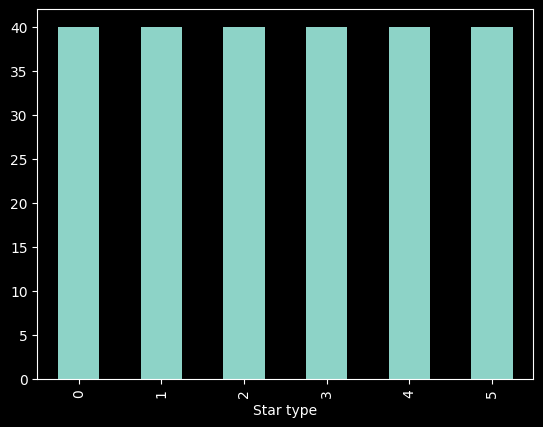

In [107]:
# Bar chart to visualize the count of stars with respective type
star_df['Star type'].value_counts().plot(kind='bar')
plt.show()

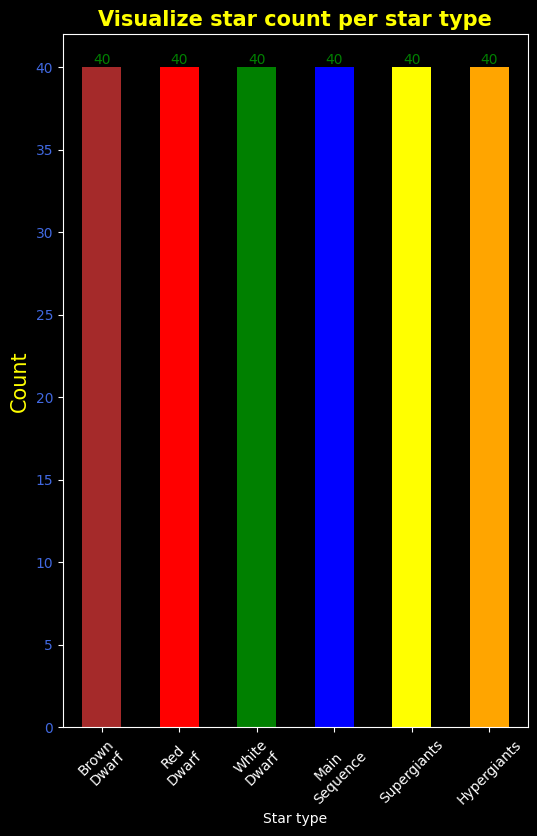

In [110]:
star_types = ['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf', 'Main\nSequence','Supergiants','Hypergiants']
plt.figure(figsize=(6,9))
plt.style.use('dark_background')
ax = star_df['Star type'].value_counts().plot(kind='bar', color=['brown','red','green','blue','yellow','orange'])
ax.bar_label(ax.containers[0], color='green')
plt.title('Visualize star count per star type', fontsize=15, color='yellow', weight='bold')
plt.yticks(color='royalblue')
plt.ylabel('Count', fontsize=15,color='yellow')
plt.xticks(ticks=[0,1,2,3,4,5],labels=star_types, rotation=45,fontsize=10)
plt.savefig(base_dir+'barplot_star_counts.png')
plt.show()



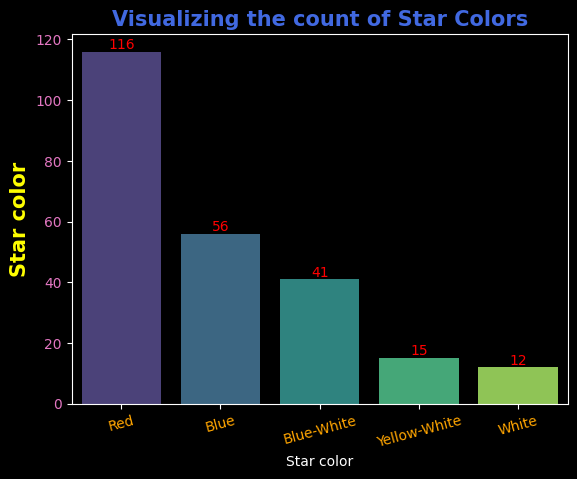

In [152]:
# Bar chart but with Seaborn + Matplotlib
x=star_df['Star color'].value_counts().index
y=star_df['Star color'].value_counts()
ax = sns.barplot(x=x, y=y,
            palette='viridis',
            hue=x,
            legend=False)
for container in ax.containers:
    ax.bar_label(container, color='red')
    
plt.title("Visualizing the count of Star Colors",color="royalblue", fontsize=15, weight='bold')
plt.xticks(rotation=15,color='orange')
plt.ylabel('Star color',color='yellow', weight='bold', fontsize=15)
plt.yticks(color='tab:pink')

plt.show()